In [1]:
import pandas as pd
import os

patentdata = pd.read_csv("W:\Desktop\Business Intelligence\AnzahlPatenteLernkategorieCluster.csv",
                       sep = ";", names = ["patent_id", "type", "group_id", "Lernkategorie"])
patentdata.head()

,patent_id,type,group_id,Lernkategorie
0,4822282,utility,G09B,Active Learning
1,5155801,utility,G06K,Supervised Learning
2,5537118,utility,G01S,Supervised Learning
3,5675710,utility,G06F,Unsupervised Learning
4,5699449,utility,G06N,Supervised Learning


In [2]:
is_utility = patentdata['type'] == 'utility'
is_utility.head()

0    True
1    True
2    True
3    True
4    True
Name: type, dtype: bool

In [3]:
patentdata_is_utility = patentdata[is_utility]
patentdata_is_utility.drop(["type"], axis = 1, inplace = True)

patentdata_is_utility.drop_duplicates(['patent_id', 'group_id', 'Lernkategorie',], keep = 'first', inplace = True)

In [4]:
patentdata_field = patentdata_is_utility.drop_duplicates(['patent_id', 'Lernkategorie'], keep = 'first')

patentdata_grouped_by_field = patentdata_field.groupby('Lernkategorie').count()
patentdata_grouped_by_field.head()

,patent_id,group_id
Lernkategorie,,
Active Learning,62,62
Reinforcement Learning,67,67
Semi-Supervised Learning,43,43
Supervised Learning,140,140
Unsupervised Learning,82,82


In [5]:
patentdata_grouped_by_field_largest = patentdata_grouped_by_field.nlargest(5, 'patent_id')
top_field = patentdata_grouped_by_field_largest.index

In [6]:
patentdata_top_field = patentdata_is_utility[patentdata_is_utility["Lernkategorie"].isin(top_field)]
patentdata_top_field.head()

,patent_id,group_id,Lernkategorie
0,4822282,G09B,Active Learning
1,5155801,G06K,Supervised Learning
2,5537118,G01S,Supervised Learning
3,5675710,G06F,Unsupervised Learning
4,5699449,G06N,Supervised Learning


In [7]:
Category = patentdata_is_utility.drop_duplicates(['patent_id', 'group_id'], keep = 'first')

patentdata_grouped_by_class = Category.groupby('group_id').count()
patentdata_grouped_by_class_largest = patentdata_grouped_by_class.nlargest(5, 'patent_id')
top_Category = patentdata_grouped_by_class_largest.index
patentdata_top_Category = patentdata_top_field[patentdata_top_field["group_id"].isin(top_Category)]


In [8]:
patentdata_is_utility = patentdata_is_utility.groupby(["Lernkategorie", "group_id"]).count()
patentdata_is_utility.head()

patent_id
Lernkategorie   group_id           
Active Learning A61K              4
                A63F              1
                B64C              1
                C07K              4
                C12N              1

In [9]:
patentdata_Aggregation = patentdata_is_utility.groupby(["Lernkategorie", "group_id"]).count()
patentdata_Aggregation.head()

patent_id
Lernkategorie   group_id           
Active Learning A61K              1
                A63F              1
                B64C              1
                C07K              1
                C12N              1

In [10]:
patentdata_matrix = patentdata_Aggregation.unstack()

patentdata_matrix.fillna(0, inplace = True)

patentdata_matrix.iloc[0:5, 0:15].head()

patent_id                                          \
group_id                      A61B A61K A61M A63F B01J B23K B25J B60H B60W   
Lernkategorie                                                                
Active Learning                0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
Reinforcement Learning         1.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
Semi-Supervised Learning       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Supervised Learning            1.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0   
Unsupervised Learning          1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   

                                                        
group_id                 B61L B62D B64C B82Y C07K C12N  
Lernkategorie                                           
Active Learning           0.0  0.0  1.0  0.0  1.0  1.0  
Reinforcement Learning    0.0  0.0  0.0  0.0  0.0  0.0  
Semi-Supervised Learning  0.0  0.0  0.0  0.0  0.0  0.0  
Supervised Learning       1.0  1.0  1.0  1.0  0.0  0.0  
Unsupervised Learning     0.0  0.0  0.0  0.0  0.0  0.0

In [11]:
!pip install yellowbrick

In [12]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k = (1,5))

visualizer.fit(patentdata_matrix)
visualizer.poof()

<Figure size 800x550 with 2 Axes>

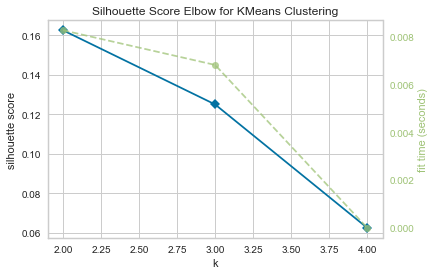

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (2,5), metric = "silhouette")

visualizer.fit(patentdata_matrix)
visualizer.poof()

In [14]:
from sklearn.cluster import KMeans 
from sklearn.metrics.pairwise import cosine_distances

similarity = cosine_distances(patentdata_matrix)
cluster = KMeans(n_clusters = 4, precompute_distances = True).fit(similarity)

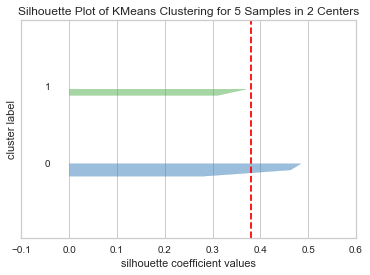

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters = 2,precompute_distances = True)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(similarity)
visualizer.poof()

In [16]:
from sklearn.cluster import KMeans

patentdata_cluster = pd.DataFrame({"Cluster":cluster.labels_}, index = patentdata_matrix.index)
patentdata_cluster.sort_values("Cluster")

,Cluster
Lernkategorie,
Semi-Supervised Learning,0
Reinforcement Learning,1
Unsupervised Learning,1
Active Learning,2
Supervised Learning,3


In [17]:
from sklearn.metrics.pairwise import cosine_similarity
patentdata_similarity = cosine_similarity(patentdata_matrix)

In [18]:
patentdata_similarity_df = pd.DataFrame(patentdata_similarity, index = patentdata_matrix.index,
                                               columns = patentdata_matrix.index)
patentdata_similarity_df.iloc[0:5, 0:2].head()

Lernkategorie,Active Learning,Reinforcement Learning
Lernkategorie,,
Active Learning,1.000000,0.393108
Reinforcement Learning,0.393108,1.000000
Semi-Supervised Learning,0.608581,0.411054
Supervised Learning,0.472805,0.596583
Unsupervised Learning,0.419961,0.729397


In [19]:
patentdata_similarity_df = patentdata_similarity_df.stack()
type(patentdata_similarity_df)


pandas.core.series.Series

In [20]:
patentdata_similarity_df = pd.DataFrame(patentdata_similarity_df)
patentdata_similarity_df.head()

0
Lernkategorie   Lernkategorie                     
Active Learning Active Learning           1.000000
                Reinforcement Learning    0.393108
                Semi-Supervised Learning  0.608581
                Supervised Learning       0.472805
                Unsupervised Learning     0.419961

In [21]:
patentdata_similarity_df.index.rename(["LernkategorieX", "LernkategorieY"], inplace = True)
patentdata_similarity_df.head()

0
LernkategorieX  LernkategorieY                    
Active Learning Active Learning           1.000000
                Reinforcement Learning    0.393108
                Semi-Supervised Learning  0.608581
                Supervised Learning       0.472805
                Unsupervised Learning     0.419961

In [22]:
patentdata_merged = patentdata_similarity_df.merge(patentdata_cluster, left_on = "LernkategorieX", right_index = True)
patentdata_merged = patentdata_merged.merge(patentdata_cluster, left_on = "LernkategorieY", right_index = True)
patentdata_merged.head()

,,0,Cluster_x,Cluster_y
Active Learning,Active Learning,1.000000,2,2
Reinforcement Learning,Active Learning,0.393108,1,2
Semi-Supervised Learning,Active Learning,0.608581,0,2
Supervised Learning,Active Learning,0.472805,3,2
Unsupervised Learning,Active Learning,0.419961,1,2


In [23]:
patentdata_merged.reset_index(inplace = True)
patentdata_merged.columns = ["LernkategorieX", "LernkategorieY", "Ähnlichkeit", "ClusterX", "ClusterY"]
patentdata_merged.head()

,LernkategorieX,LernkategorieY,Ähnlichkeit,ClusterX,ClusterY
0,Active Learning,Active Learning,1.000000,2,2
1,Reinforcement Learning,Active Learning,0.393108,1,2
2,Semi-Supervised Learning,Active Learning,0.608581,0,2
3,Supervised Learning,Active Learning,0.472805,3,2
4,Unsupervised Learning,Active Learning,0.419961,1,2


In [24]:
patentdata_merged.sort_values(["ClusterX", "ClusterY"], inplace = True)

In [25]:
from bokeh.io import reset_output, show, output_notebook
from bokeh.models import ColumnDataSource, Title, HoverTool
from bokeh.plotting import figure
from bokeh.transform import transform
from bokeh.models import LinearColorMapper
from bokeh.palettes import Inferno
import numpy as np
output_notebook()

Loading BokehJS ...

In [26]:
print(Inferno[10])
colors = ['#FCFEA4', '#F7CF3A', '#FB9906', '#ED6825', '#CD4247', '#A42C60', '#781C6D', '#4A0B6A', '#1A0B40', '#000003']

['#000003', '#1A0B40', '#4A0B6A', '#781C6D', '#A42C60', '#CD4247', '#ED6825', '#FB9906', '#F7CF3A', '#FCFEA4']


In [27]:
patentdata_mapper = LinearColorMapper(palette = colors, low = patentdata_merged["Ähnlichkeit"].min(),
high = patentdata_merged["Ähnlichkeit"].max())

In [28]:
hover = HoverTool(tooltips = [("LernkategorieX", "@LernkategorieX"), ("LernkategorieY", "@LernkategorieY"), 
                              ("Ähnlichkeit", "@Ähnlichkeit")])
tools = [hover, "pan", "wheel_zoom", "box_zoom", "reset", "save"]

In [29]:
patentdata_source = ColumnDataSource(patentdata_merged)

In [30]:
p = figure(title = "Cluster Analyse zu den Lernkatogerien",
                x_axis_location = "above",
                tools = tools,
                toolbar_location = None,
                x_range = patentdata_merged["LernkategorieX"].unique(),
                y_range = list(reversed(patentdata_merged["LernkategorieY"].unique())))

In [31]:
p.plot_width = 800
p.plot_height = 800
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "8pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

In [32]:
p.rect('LernkategorieX',
       'LernkategorieY',
       0.9, 0.9, 
       source=patentdata_source,
       fill_color = transform("Ähnlichkeit",
                              patentdata_mapper),
       hover_line_color='black',
       hover_color = transform("Ähnlichkeit",
                               patentdata_mapper))
           
show(p)